In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data_wisata = pd.read_csv('tempat_wisata_yogyakarta.csv')
data_wisata.drop(columns=['Unnamed: 0'])
data_wisata = data_wisata.loc[(data_wisata['kategori'] != 'Pusat Perbelanjaan') ].reset_index(drop=True)

In [3]:
len(data_wisata)

123

In [4]:
data_wisata.kategori.unique()

array(['Taman Hiburan', 'Budaya', 'Cagar Alam', 'Bahari'], dtype=object)

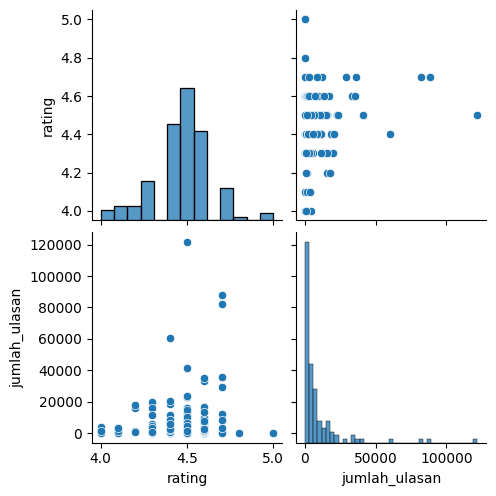

In [5]:
sns.pairplot(data_wisata[['rating', 'jumlah_ulasan']])

In [6]:
from sklearn.preprocessing import MinMaxScaler
data = data_wisata[['tarif', 'rating', 'jumlah_ulasan']].copy()
# data = data_wisata[['rating', 'jumlah_ulasan']].copy()
scaler = MinMaxScaler()
scaler.fit(data)
data[['tarif', 'rating', 'jumlah_ulasan']] = scaler.transform(data)
# data[['rating', 'jumlah_ulasan']] = scaler.transform(data)

In [7]:
from sklearn import cluster, metrics
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score


In [8]:
SK = range(2,21)
sil_score = []
for i in SK:
    labels=cluster.KMeans(n_clusters=i,init="k-means++").fit(data).labels_
    score = metrics.silhouette_score(data,labels,metric="euclidean")
    sil_score.append(score)
    print ("Silhouette score for k(clusters) = "+str(i)+" is " + str(score) )

Silhouette score for k(clusters) = 2 is 0.3475540974342908
Silhouette score for k(clusters) = 3 is 0.4068738762310739
Silhouette score for k(clusters) = 4 is 0.447370973865903
Silhouette score for k(clusters) = 5 is 0.40882505764476657
Silhouette score for k(clusters) = 6 is 0.44725566779885056
Silhouette score for k(clusters) = 7 is 0.46488198124811847
Silhouette score for k(clusters) = 8 is 0.47603517229410086
Silhouette score for k(clusters) = 9 is 0.4724828522458065
Silhouette score for k(clusters) = 10 is 0.480381008431988
Silhouette score for k(clusters) = 11 is 0.48094417769227205
Silhouette score for k(clusters) = 12 is 0.48668248115253776
Silhouette score for k(clusters) = 13 is 0.5014426000279332
Silhouette score for k(clusters) = 14 is 0.52539356276113
Silhouette score for k(clusters) = 15 is 0.5464462997325962
Silhouette score for k(clusters) = 16 is 0.5434848121889878
Silhouette score for k(clusters) = 17 is 0.5730941267777929
Silhouette score for k(clusters) = 18 is 0.559

In [9]:
sil_centers = pd.DataFrame({'Clusters' : SK, 'Sil Score' : sil_score})
sil_centers

,Clusters,Sil Score
0,2,0.347554
1,3,0.406874
2,4,0.447371
3,5,0.408825
4,6,0.447256
5,7,0.464882
6,8,0.476035
7,9,0.472483
8,10,0.480381
9,11,0.480944


<AxesSubplot: xlabel='Clusters', ylabel='Sil Score'>

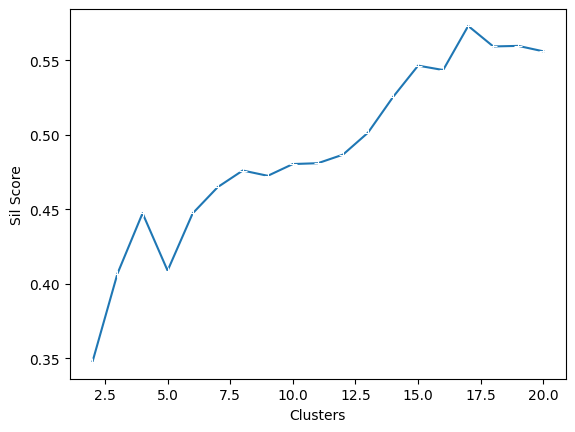

In [10]:
sns.lineplot(x = 'Clusters', y = 'Sil Score', data = sil_centers, marker="+")

In [11]:
banyak_kluster = 17

kmeans = KMeans(n_clusters=banyak_kluster, init='k-means++')
kmeans.fit(data)
labels = kmeans.labels_
data_wisata['kluster'] = labels



In [12]:
# warna = {
#     0 : 'red',
#     1 : 'yellow',
#     2 : 'green',
#     3 : 'blue',
#     4 : 'orange',
#     5 : 'purple',
#     6 : 'brown',
#     7 : 'pink'
#     # 8 : 'lime',
#     # 9 : 'cyan'
# }
# def atur_warna_kluster(kluster):
#     return warna[kluster]
# data_wisata['kluster'] = labels
# data_wisata['warna_kluster'] = data_wisata['kluster'].apply(atur_warna_kluster)

<Figure size 1000x600 with 0 Axes>

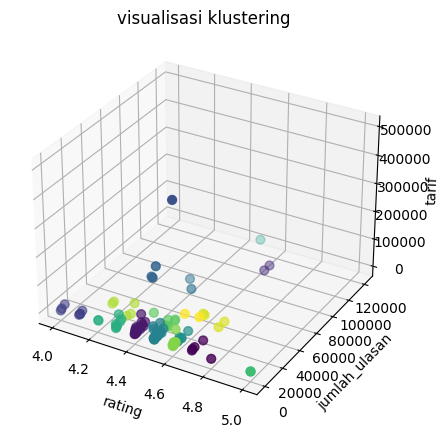

In [13]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10,6))
# for index, row in data_wisata.iterrows():
#     index = row.name
#     plt.text(row['rating'], row['tarif'], index)
    
# plt.scatter(data_wisata['rating'], data_wisata['tarif'], c=data_wisata['warna_kluster'])

fig = plt.figure(figsize=(5,10))
ax = fig.add_subplot(111, projection='3d')
x = data_wisata['rating']
y = data_wisata['jumlah_ulasan']
z = data_wisata['tarif']
ax.set_xlabel('rating')
ax.set_ylabel('jumlah_ulasan')
ax.set_zlabel('tarif')
ax.set_title('visualisasi klustering')
ax.scatter(x,y,z, marker="o", c=labels, s=40)

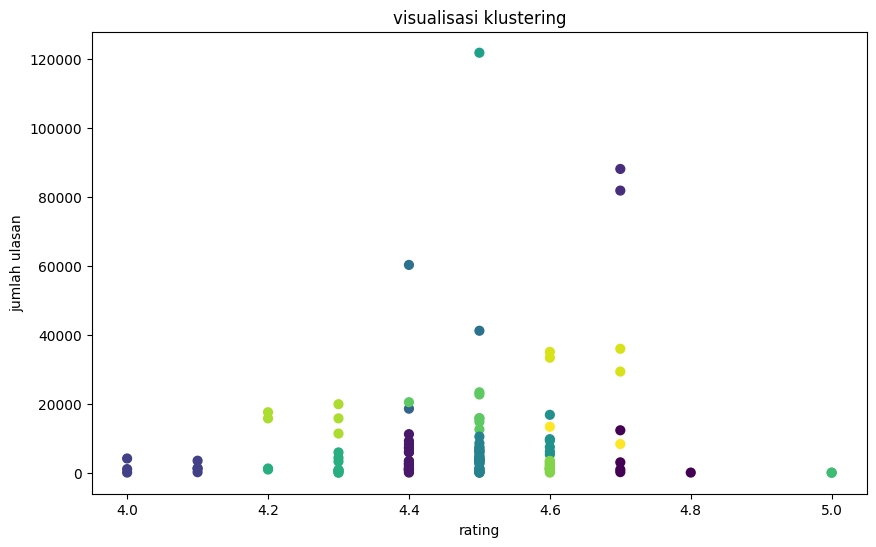

In [14]:
# from matplotlib import pyplot as plt
# plt.figure(figsize=(10,6))
# for index, row in data_wisata.iterrows():
#     index = row.name
#     plt.text(row['rating'], row['tarif'], index)
    
# plt.scatter(data_wisata['rating'], data_wisata['tarif'], c=data_wisata['warna_kluster'])

plt.figure(figsize=(10,6))
x = data_wisata['rating']
y = data_wisata['jumlah_ulasan']
plt.xlabel("rating")
plt.ylabel("jumlah ulasan")
plt.title("visualisasi klustering")
plt.scatter(x,y, marker="o", c=labels, s=40)
plt.show()

In [15]:
# data_wisata['warna_kluster'].value_counts()

In [16]:
# data_wisata['warna_kluster'].value_counts()

Text(0, 0.5, 'jumlah')

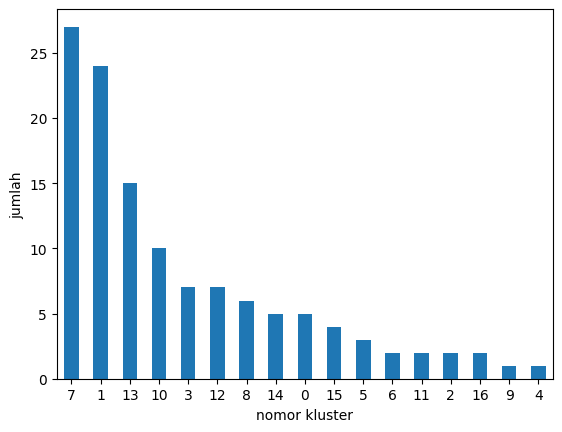

In [17]:
data_wisata['kluster'].value_counts().plot(kind='bar', rot=0, )
plt.xlabel('nomor kluster')
plt.ylabel('jumlah')

In [18]:
def show_kluster_information(data_kluster):
    data = data_kluster["data"]
    nomor_kluster = str(data_kluster["nomor"])
    warna_kluster = data_kluster['warna']
    warna_kluster = ""
    print("---------------- informasi kluster " + nomor_kluster + " ---------------------")
    print("warna kluster " + warna_kluster + " : ", warna_kluster)
    print("rentang tarif  : ", data["tarif"].min(), " - ", data["tarif"].max())
    print("rentang rating : ", data["rating"].min(), " - ", data["rating"].max())
    print("rentang jumlah ulasan : ", data["jumlah_ulasan"].min(), " - ", data["jumlah_ulasan"].max())
    print()
    print("rata-rata tarif  : ", data["tarif"].mean())
    print("rata-rata rating : ", data["rating"].mean())
    print("rata-rata jumlah ulasan : ", data["jumlah_ulasan"].mean())
    print()
    print("banyak kluster " + nomor_kluster + " : ", len(data), "kluster")
    print()


In [19]:
data_klusters = []
for i in range(banyak_kluster):
    data_append = {"data" : data_wisata.loc[data_wisata['kluster'] == i], "nomor" : i, "warna" : ""}
    data_klusters.append(data_append)

In [20]:
def is_minimum_condition_fulfilled(data_kluster, columns_with_minimum_values):
    for column in columns_with_minimum_values:
        data = data_kluster['data']
        if data[column].mean() < columns_with_minimum_values[column]:
            return False
    return True
        

def filter_kluster(data_klusters, columns_with_minimum_values):
    data_filter = []
    for data_kluster in data_klusters:
        if is_minimum_condition_fulfilled(data_kluster, columns_with_minimum_values):
            data_filter.append(data_kluster)
            
    return data_filter


In [21]:
minimum_mean_condition = {
    "rating" : 4.5,
    "jumlah_ulasan" : 10000
}

In [22]:
data_klusters_filter = filter_kluster(data_klusters, minimum_mean_condition)

In [23]:
for data_kluster in data_klusters_filter:
    show_kluster_information(data_kluster)

---------------- informasi kluster 2 ---------------------
warna kluster  :  
rentang tarif  :  50000  -  50000
rentang rating :  4.7  -  4.7
rentang jumlah ulasan :  81879  -  88154

rata-rata tarif  :  50000.0
rata-rata rating :  4.7
rata-rata jumlah ulasan :  85016.5

banyak kluster 2 :  2 kluster

---------------- informasi kluster 9 ---------------------
warna kluster  :  
rentang tarif  :  10000  -  10000
rentang rating :  4.5  -  4.5
rentang jumlah ulasan :  121885  -  121885

rata-rata tarif  :  10000.0
rata-rata rating :  4.5
rata-rata jumlah ulasan :  121885.0

banyak kluster 9 :  1 kluster

---------------- informasi kluster 15 ---------------------
warna kluster  :  
rentang tarif  :  0  -  15000
rentang rating :  4.6  -  4.7
rentang jumlah ulasan :  29360  -  35969

rata-rata tarif  :  5000.0
rata-rata rating :  4.6499999999999995
rata-rata jumlah ulasan :  33442.75

banyak kluster 15 :  4 kluster

---------------- informasi kluster 16 ---------------------
warna kluster  

In [24]:
for data_kluster in data_klusters:
    show_kluster_information(data_kluster)

---------------- informasi kluster 0 ---------------------
warna kluster  :  
rentang tarif  :  0  -  10000
rentang rating :  4.7  -  4.8
rentang jumlah ulasan :  42  -  12317

rata-rata tarif  :  6400.0
rata-rata rating :  4.72
rata-rata jumlah ulasan :  3295.8

banyak kluster 0 :  5 kluster

---------------- informasi kluster 1 ---------------------
warna kluster  :  
rentang tarif  :  0  -  50000
rentang rating :  4.4  -  4.4
rentang jumlah ulasan :  43  -  11194

rata-rata tarif  :  8291.666666666666
rata-rata rating :  4.4
rata-rata jumlah ulasan :  3417.0

banyak kluster 1 :  24 kluster

---------------- informasi kluster 2 ---------------------
warna kluster  :  
rentang tarif  :  50000  -  50000
rentang rating :  4.7  -  4.7
rentang jumlah ulasan :  81879  -  88154

rata-rata tarif  :  50000.0
rata-rata rating :  4.7
rata-rata jumlah ulasan :  85016.5

banyak kluster 2 :  2 kluster

---------------- informasi kluster 3 ---------------------
warna kluster  :  
rentang tarif  :  

In [25]:
data_klusters_filter[1]['data']

,Unnamed: 0,id_tempat,nama_tempat,deskripsi,kategori,kota,tarif,rating,waktu_menit,koordinat,latitude,longitude,jumlah_ulasan,kluster
89,92,177,Pantai Parangtritis,Pantai Parangtritis (bahasa Jawa: ꦥꦱꦶꦱꦶꦂ ꦥꦫꦁꦠꦿ...,Bahari,Yogyakarta,10000,4.5,NaN,"{'lat': -8.024607999999999, 'lng': 110.3298045}",-8.024.608,1.103.298.045,121885,9


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=6fd3c969-71bb-42a9-b8f6-32e847b35616' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>